---
title: Automatic Differentiation
---

## What is Autograd?

In PyTorch, autograd automatically computes gradients. It is a key part of PyTorch's deep learning framework, and is used to optimize model parameters during training by computing gradients of the loss function with respect to the model's parameters.

Autograd can compute gradients for both scalar and vector-valued functions, and it can do so efficiently for a large variety of differentiable operations, including matrix and element-wise operations, as well as higher-order derivatives.

Let's take a simple example of looking at a function. 
$$y = a^3 - b^2 + 3$$

Differentiation of this function with respect to a and b is going to be:

$$\frac{dy}{da} = 3a^2$$

$$\frac{dy}{db} = -2b$$

So if:
$$a = 5, b = 6$$

Gradient with respect to a and b will be:
$$\frac{dy}{da} = 3a^2 => 3*5^2 => 75$$ 

$$\frac{dy}{db} = -2b => -2*6 => -12$$

Now let's observe these in PyTorch. To make a tensor compute gradients automatically we can initialize them with `requires_grad = True`. 

In [1]:
import torch

## initializing a anb b with requires grad = True
a = torch.tensor([5.], requires_grad=True)
b = torch.tensor([6.], requires_grad=True)

y = a**3 - b**2
y

tensor([89.], grad_fn=<SubBackward0>)

To compute the derivatives we can call `backward` method and retrieve gradients from a and b calling `a.grad` and `b.grad`.

In [2]:
y.backward()
print(f"Gradient of a and b is {a.grad.item()} and {b.grad.item()} respectively.")

Gradient of a and b is 75.0 and -12.0 respectively.


As computed above the gradient of `a` and `b` is 75 and -12 respectively.

## Exercise: Linear regression

In this section, we will implement a linear regression model in PyTorch and use the Autograd package to optimize the model's parameters through gradient descent.

### Creating dummy data

Let's begin by generating linear data that exhibits linear characteristics. We will use sklearn `make_regression` function to do the same.

In [1]:
#| code-fold: true
## Importing required functions
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
import time
from IPython.display import clear_output
sns.set_style("dark")
%matplotlib inline

def plot_data(x, y, y_pred=None, label=None):
    clear_output(wait=True)
    sns.scatterplot(x = X.squeeze(), y=y)
    if y_pred is not None:
        sns.lineplot(x = X.squeeze(), y=y_pred.squeeze(), color='red')
    plt.xlabel("Input")
    plt.ylabel("Target")
    if label: 
        plt.title(label)
    plt.show()
    time.sleep(0.5)

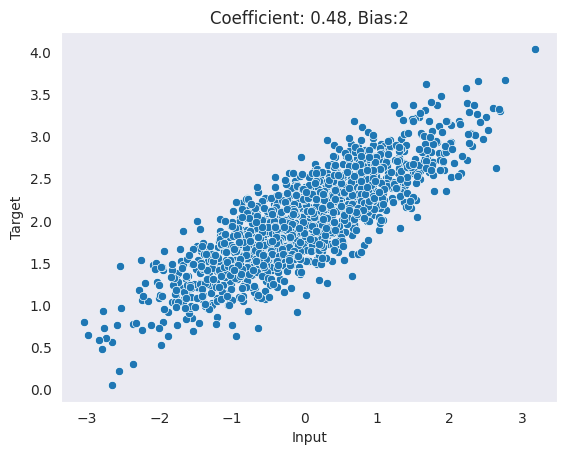

In [31]:
#| fig-cap: Fig 1. Visualizing our linear data
#| fig-align: left
## Generate some dataset
X, y, coef = make_regression(
    n_samples=1500,
    n_features=1,
    n_informative=1,
    noise=0.3,
    coef=True,
    random_state=0,
    bias=2
)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
plot_data(X,y, label=f"Coefficient: {coef:.2f}, Bias:{2}")

### Define a linear regression function

Since we are only building a simple linear regression with one feature and one bias term. It can be defined as following -

In [32]:
class Linear:
    def __init__(self, n_in, n_out):
        self.w = torch.randn(n_in, n_out).requires_grad_(True)
        self.b = torch.randn(n_out).requires_grad_(True)
        self.params = [self.w, self.b]
        
    def forward(self, x):
        return x @ self.w + self.b

Let's initialize the model and make a random prediction.

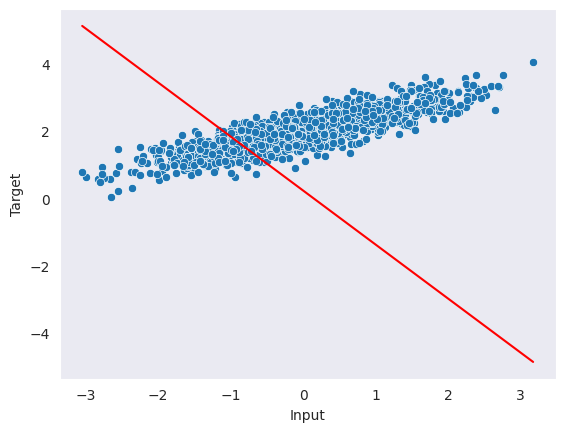

In [47]:
#| fig-cap: Fig 2. Visualizing our data with random predictions
#| fig-align: left
## Initializing model
torch.manual_seed(4)
model = Linear(X.shape[1], 1)
## Making a random prediction
with torch.no_grad():
    y_pred = model.forward(X).numpy()
    
## Plotting the prediction
plot_data(X, y, y_pred)

As shown above, our randomly generated predictions do not accurately fit the data. To improve the model's performance, we can use the `autograd` function to create a simple gradient descent function called `step`, which runs one epoch of training. This will allow us to optimize the model's parameters and improve the accuracy of our predictions.

### Stochastic Gradient Descent

In [48]:
def step(X, y, model, lr = 0.1):
    y_pred = model.forward(X)
    
    ## Calculation mean square error
    loss = torch.square(y - y_pred.squeeze()).mean()
    
    ## Computing gradients
    loss.backward()
    
    ## Updating parameters
    with torch.no_grad():
        for param in model.params:
            param -= lr*param.grad.data
            param.grad.data.zero_()
    return loss

Lets walk through the `step` function:

- The model performs a forward pass to generate predictions.
- The mean squared error loss is calculated between the predicted values and the true values.
- The backward method is used to compute gradients for the model's parameters.
- The gradients are updated with the specified learning rate.
- The gradients are reset to zero for the next iteration.

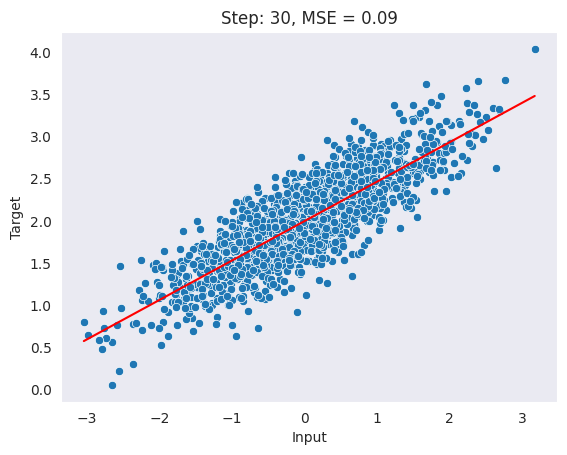

In [49]:
#| fig-cap: Fig 3. Visualizing the predictions of our trained model over the data
#| fig-align: left
for i in range(30):
    # run one gradient descent epoch
    loss = step(X, y, model)
    with torch.no_grad():
        y_pred = model.forward(X).numpy()
    # plot each step with delay
    plot_data(X, y, y_pred, label=f"Step: {i+1}, MSE = {loss:.2f}")

As observed above, our model's performance improved with each epoch and the mean squared error (MSE) decreased consistently.

In [44]:
print(f"True coefficient is {coef.item():.2f} and predicted coefficient is {model.w.item():.2f}.")
print(f"True bias term is {2} and predicted coefficient is {model.b.item():.2f}.")

True coefficient is 0.48 and predicted coefficient is 0.47.
True bias term is 2 and predicted coefficient is 2.00.


## Conclusion

Autograd is a key part of PyTorch's deep learning framework and is an essential tool for optimizing and training neural network models. It is designed to make it easy to implement and train complex models by automatically computing gradients for differentiable operations.

## References

- [Pytorch Auto grad tutorial](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)